In [1]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pdb
%matplotlib inline

Problem #1: Train and test are close, so no overfitting and no outliers. Pair plot shows some second-order effect for x1, so let's do square of that. x1 is also expressed in years, so we can modify it to be age, and that provides a simpler model.

In [2]:
df = pd.read_csv('data/1_train.csv')
df2 = pd.read_csv('data/1_test.csv')

In [3]:
m = LinearRegression()
m.fit(df[['x1','x2']],df['y'])
m.score(df[['x1','x2']],df['y'])

0.96231697777374869

In [4]:
m.score(df2[['x1','x2']],df2['y'])

0.95189529318410093

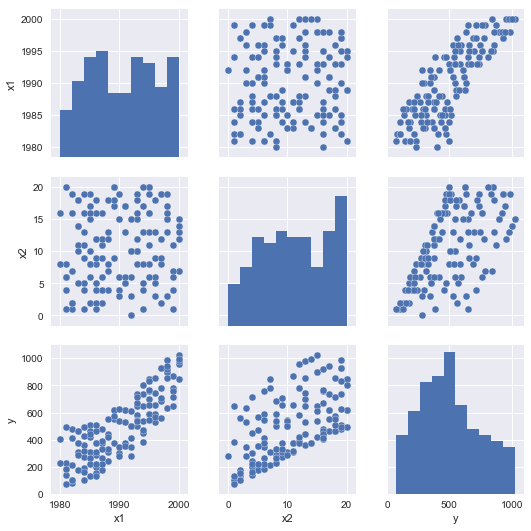

In [5]:
sns.pairplot(df)

In [6]:
df['x3'] = df['x1']**2

In [7]:
m = LinearRegression()
m.fit(df[['x1','x3']],df['y'])
m.score(df[['x1','x3']],df['y'])

0.72277272530876424

In [8]:
m = LinearRegression()
m.fit(df[['x1','x2','x3']],df['y'])
m.score(df[['x1','x2','x3']],df['y'])

0.99999398642030646

In [9]:
df['x4'] = df['x1'] - min(df['x1'])

In [10]:
df['x5'] = df['x4']**2

In [11]:
m = LinearRegression()
m.fit(df[['x5','x2']],df['y'])
m.score(df[['x5','x2']],df['y'])

0.99999398600764222

Problem #2: There are a lot of missing values. We first leave out all of them and do a model. We realize that x1 is not contributing to the model. So leave out that column. Once we do that, we now have a lot more rows to work with. And that helps improve out score.

In [13]:
df = pd.read_csv('data/2_train.csv')
df2 = pd.read_csv('data/2_test.csv')

In [16]:
m = LinearRegression()
m.fit(df[50:100][['x1','x2','x3']],df[50:100]['y'])
m.score(df[50:100][['x1','x2','x3']],df[50:100]['y'])

0.87186569238249489

In [17]:
m.coef_

array([-0.01912716,  0.84863767,  1.19411537])

In [18]:
m.fit(df[50:100][['x2','x3']],df[50:100]['y'])
m.score(df[50:100][['x2','x3']],df[50:100]['y'])

0.87164731809842233

In [19]:
m = LinearRegression()
m.fit(df[50:150][['x2','x3']],df[50:150]['y'])
m.score(df[50:150][['x2','x3']],df[50:150]['y'])

0.89701418278550493

Problem #3: Here, the test score is greater that train score. Which is a clear indication of model outliers. We look at the residuals to idenfity those outliers and throw them out.

In [20]:
df = pd.read_csv('data/3_train.csv')
df2 = pd.read_csv('data/3_test.csv')

In [21]:
m = LinearRegression()
m.fit(df[['x1','x2']],df['y'])
m.score(df[['x1','x2']],df['y'])

0.82685534810133199

In [22]:
m.score(df2[['x1','x2']],df2['y'])

0.86324743793299108

In [24]:
df['res'] = abs(m.predict(df[['x1','x2']])-df['y'])

In [25]:
df.sort_values(['res']).tail()

,x1,x2,y,res
32,2.581403,-0.806480,9.073148,0.976809
18,0.135162,0.800799,6.098683,0.987782
6,2.466657,0.150775,9.498368,1.141568
9,2.436761,-0.131043,5.110000,3.073406
0,2.484074,0.378226,5.110000,3.376550


In [26]:
df = df.drop(df.index[9])
df = df.drop(df.index[0])

In [27]:
m = LinearRegression()
m.fit(df[['x1','x2']],df['y'])
m.score(df[['x1','x2']],df['y'])

0.93728198737712864